<a href="https://colab.research.google.com/github/SundasAshraf/Disease-classification-based-on-textual-data/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import torch

import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data/de/drugsComTrain_raw.csv', usecols = ['condition','review'],on_bad_lines='skip')
df.head()
print('total entries in dataset',df.shape[0])
print(df)
df['condition']=df['condition'].replace('Diabetes, Type 2','Diabetes')
df['condition'].value_counts()
df=df.loc[df['condition'].isin(['Urinary Tract Infection', 'Acne','Diabetes','Migraine',
                                 'Bipolar Disorde','Anxiety','Depression'])]
df['condition']=df['condition'].replace('Bipolar Disorde','Depression')
df['condition']=df['condition'].replace('Anxiety','Depression')

Mounted at /content/drive
total entries in dataset 161294
                           condition  \
0       Left Ventricular Dysfunction   
1                               ADHD   
2                      Birth Control   
3                      Birth Control   
4                  Opiate Dependence   
...                              ...   
161289            Alcohol Dependence   
161290               Nausea/Vomiting   
161291          Rheumatoid Arthritis   
161292           Underactive Thyroid   
161293         Constipation, Chronic   

                                                   review  
0       "It has no side effect, I take it in combinati...  
1       "My son is halfway through his fourth week of ...  
2       "I used to take another oral contraceptive, wh...  
3       "This is my first time using any form of birth...  
4       "Suboxone has completely turned my life around...  
...                                                   ...  
161289  "I wrote my first report in Mid-O

<ipython-input-1-c62961050de1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition']=df['condition'].replace('Bipolar Disorde','Depression')
<ipython-input-1-c62961050de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition']=df['condition'].replace('Anxiety','Depression')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/data/de/Symptom2Disease.csv',
                  usecols = ['label','text'],on_bad_lines='skip',engine='python')
print('total entries in dataset',df2.shape[0])
df2.head()
df2['label'].value_counts()
df2=df2.loc[df2['label'].isin(['urinary tract infection', 'Migraine','Hypertension','Acne','diabetes'])]
df2['label'].value_counts()
df2['label']=df2['label'].replace('Hypertension','Depression')
df2['label']=df2['label'].replace('urinary tract infection','Urinary Tract Infection')
df2['label']=df2['label'].replace('diabetes','Diabetes')
print(df2)
df2['label'].value_counts()

total entries in dataset 1200
         label                                               text
550       Acne  I've been having a really bad rash on my skin ...
551       Acne  I've just developed a severe rash on my skin. ...
552       Acne  My skin has been breaking out in a terrible ra...
553       Acne  I've recently been experiencing a severe skin ...
554       Acne  I've been having a very unhealthy rash on my s...
...        ...                                                ...
1195  Diabetes  I'm shaking and trembling all over. I've lost ...
1196  Diabetes  Particularly in the crevices of my skin, I hav...
1197  Diabetes  I regularly experience these intense urges and...
1198  Diabetes  I have trouble breathing, especially outside. ...
1199  Diabetes  I constantly sneeze and have a dry cough. My i...

[250 rows x 2 columns]


Acne                       50
Depression                 50
Migraine                   50
Urinary Tract Infection    50
Diabetes                   50
Name: label, dtype: int64

In [ ]:


# segregating dataframe for analyzing individual condition
X_depression=df[(df['condition']=='Depression')]
X_Acne=df[(df['condition']=='Acne')]
X_diab=df[(df['condition']=='Diabetes')]
X_Migrane=df[(df['condition']=='Migraine')]
X_urinary=df[(df['condition']=='Urinary Tract Infection')]
df['condition'].value_counts()

Depression                 19197
Acne                        5588
Diabetes                    2554
Migraine                    1694
Urinary Tract Infection     1316
Name: condition, dtype: int64

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()
import re
import nltk
nltk.download('wordnet')
stop=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def lemit(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w)for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
df['review_clean_lemit'] = df['review'].apply(lemit)
df2['review_clean2_lemit'] = df2['text'].apply(lemit)


<ipython-input-5-c6cbb273921b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [ ]:
def stem(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    stem_words = [ porter.stem(w)for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stem_words))

In [ ]:
df['review_clean_stem'] = df['review'].apply(stem)
df2['review_clean2_stem'] = df2['text'].apply(stem)

<ipython-input-7-588e16ddfab0>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [ ]:
def stem_lemit(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
df['review_clean_stem_lemit'] = df['review'].apply(stem_lemit)
df2['review_clean2_stem_lemit'] = df2['text'].apply(stem_lemit)

In [ ]:
df.head()

,condition,review,review_clean_lemit,review_clean_stem
7,Depression,"""Abilify changed my life. There is hope. I was...",abilify changed life hope zoloft clonidine fir...,abilifi chang life hope zoloft clonidin first ...
11,Depression,"""I have taken anti-depressants for years, with...",taken anti depressant year improvement mostly ...,taken anti depress year improv mostli moder se...
16,Urinary Tract Infection,"""This drug worked very well for me and cleared...",drug worked well cleared uti matter hr althoug...,drug work well clear uti matter hr although da...
18,Depression,"""I&#039;ve been on every medicine under the su...",every medicine sun seems manage hypomania mani...,everi medicin sun seem manag hypomania mania b...
29,Migraine,"""At first I suffered through them. This includ...",first suffered included splitting head pain na...,first suffer includ split head pain nausea vom...


In [ ]:
df2.head()

,label,text,review_clean2
550,Acne,I've been having a really bad rash on my skin ...,really bad rash skin lately full pu filled pim...
551,Acne,I've just developed a severe rash on my skin. ...,developed severe rash skin clogged pu filled p...
552,Acne,My skin has been breaking out in a terrible ra...,skin breaking terrible rash lately blackhead p...
553,Acne,I've recently been experiencing a severe skin ...,recently experiencing severe skin rash blackhe...
554,Acne,I've been having a very unhealthy rash on my s...,unhealthy rash skin latterly filled pu filled ...


In [ ]:
X_feat=df['review_clean_lemit']
y=df['condition']
print(len(X_feat))
print(len(y))

test_feat2=df2['review_clean2_lemit']
test_y2=df2['label']
print(len(test_feat2))
print(len(test_y2))

30349
30349
250
250


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation_samples, y_train, y_validation_labels = train_test_split(X_feat, y,stratify=y,test_size=0.3, random_state=0)
#test_feat, X_validation_samples, test_y, y_validation_labels = train_test_split(X_feat, y,stratify=y,test_size=0.3, random_state=0)

print('training samples',len(X_train))
print('training labels',len(y_train))
print('validation samples',len(X_validation_samples))
print('validation labels',len(y_validation_labels))
test_feat=test_feat2
test_y=test_y2


t=[]
c=[]

print('testing samples',len(test_feat))#200
print('testing labels',len(test_y))#200


training samples 21244
training labels 21244
validation samples 9105
validation labels 9105
testing samples 250
testing labels 250


feature count

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
train_features = tfidf_vectorizer.fit_transform(X_train)
test_validation_features = tfidf_vectorizer.transform(X_validation_samples)
test_features = tfidf_vectorizer.transform(test_feat)

In [ ]:
print(train_features.shape)
print(test_validation_features.shape)
print(test_features.shape)


(21244, 791522)
(9105, 791522)
(250, 791522)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

***Classification*** passive classifier

validation accuracy:   0.977
testing accuracy:   0.476
Confusion matrix, without normalization


NameError: ignored

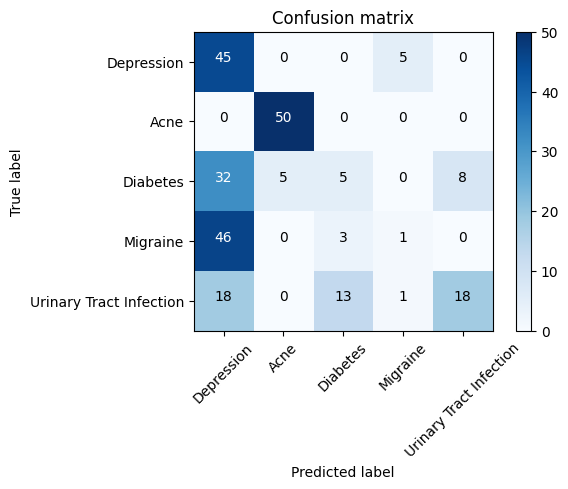

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1.0, random_state=1, kernel='linear')
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools # confusion matrix
import string
svc.fit(train_features , y_train)
pred = svc.predict(test_validation_features)
score = metrics.accuracy_score(y_validation_labels, pred)
print("validation accuracy:   %0.3f" % score)
#cm = confusion_matrix(y_validation_labels, pred, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
#plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
pred2 = svc.predict(test_features)
score2 = metrics.accuracy_score(test_y, pred2)
print("testing accuracy:   %0.3f" % score2)
cm = confusion_matrix(test_y, pred2, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
print(classification_report(test_y, pred2, target_names=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection']))

validation accuracy:   0.778
testing accuracy:   0.832
Confusion matrix, without normalization


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

             Depression       1.00      0.90      0.95        39
                   Acne       0.80      1.00      0.89       167
               Diabetes       1.00      0.18      0.31        22
               Migraine       0.00      0.00      0.00        11
Urinary Tract Infection       1.00      0.18      0.31        11

               accuracy                           0.83       250
              macro avg       0.76      0.45      0.49       250
           weighted avg       0.82      0.83      0.78       250



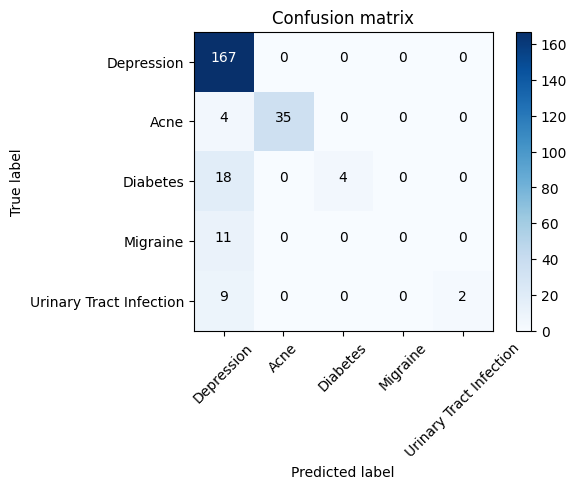

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools # confusion matrix
import string
pass_tf = MultinomialNB()
pass_tf.fit(train_features , y_train)
pred = pass_tf.predict(test_validation_features)
score = metrics.accuracy_score(y_validation_labels, pred)
print("validation accuracy:   %0.3f" % score)
#cm = confusion_matrix(y_validation_labels, pred, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
#plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
pred2 = pass_tf.predict(test_features)
score2 = metrics.accuracy_score(test_y, pred2)
print("testing accuracy:   %0.3f" % score2)
cm = confusion_matrix(test_y, pred2, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
print(classification_report(test_y, pred2, target_names=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection']))

validation accuracy:   0.979
Confusion matrix, without normalization


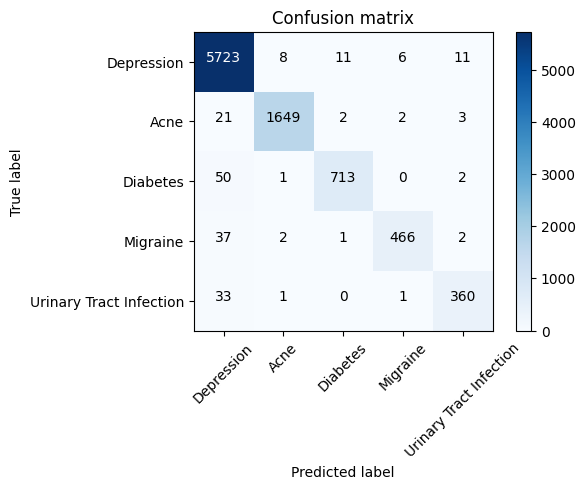

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools # confusion matrix
import string
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(train_features , y_train)
pred = pass_tf.predict(test_validation_features)
score = metrics.accuracy_score(y_validation_labels, pred)
print("validation accuracy:   %0.3f" % score)
cm = confusion_matrix(y_validation_labels, pred, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


validation accuracy:   0.956
testing accuracy:   0.972
Confusion matrix, without normalization
                         precision    recall  f1-score   support

             Depression       1.00      1.00      1.00        39
                   Acne       0.96      1.00      0.98       167
               Diabetes       1.00      0.86      0.93        22
               Migraine       1.00      0.82      0.90        11
Urinary Tract Infection       1.00      0.82      0.90        11

               accuracy                           0.97       250
              macro avg       0.99      0.90      0.94       250
           weighted avg       0.97      0.97      0.97       250



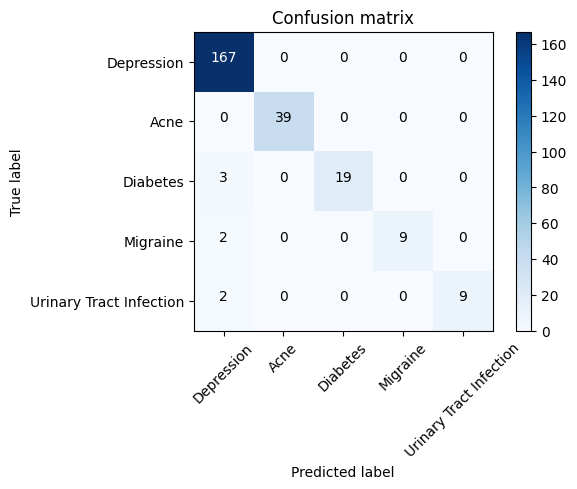

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools # confusion matrix
import string
model = LogisticRegression()
model.fit(train_features , y_train)
pred =model.predict(test_validation_features)
score = metrics.accuracy_score(y_validation_labels, pred)
print("validation accuracy:   %0.3f" % score)
#cm = confusion_matrix(y_validation_labels, pred, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
#plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
pred2 = model.predict(test_features)
score2 = metrics.accuracy_score(test_y, pred2)
print("testing accuracy:   %0.3f" % score2)
cm = confusion_matrix(test_y, pred2, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
print(classification_report(test_y, pred2, target_names=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection']))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# import Support Vector Classifier
from sklearn.svm import SVC
# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')
# create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=10, base_estimator=svc,learning_rate=1, random_state=0)
# train adaboost classifer
model2 = abc.fit(train_features , y_train)
# predict the response for test dataset

pred =model2.predict(test_validation_features)
score = metrics.accuracy_score(y_validation_labels, pred)
print("validation accuracy:   %0.3f" % score)
#cm = confusion_matrix(y_validation_labels, pred, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
#plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
pred2 = model2.predict(test_features)
score2 = metrics.accuracy_score(test_y, pred2)
print("testing accuracy with SVC Base Estimator:   %0.3f" % score2)
cm = confusion_matrix(test_y, pred2, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
print(classification_report(test_y, pred2, target_names=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection']))

# calculate and print model accuracy
#print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


testing accuracy:   1.000
Confusion matrix, without normalization
                         precision    recall  f1-score   support

             Depression       1.00      1.00      1.00        39
                   Acne       1.00      1.00      1.00       167
               Diabetes       1.00      1.00      1.00        22
               Migraine       1.00      1.00      1.00        11
Urinary Tract Infection       1.00      1.00      1.00        11

               accuracy                           1.00       250
              macro avg       1.00      1.00      1.00       250
           weighted avg       1.00      1.00      1.00       250



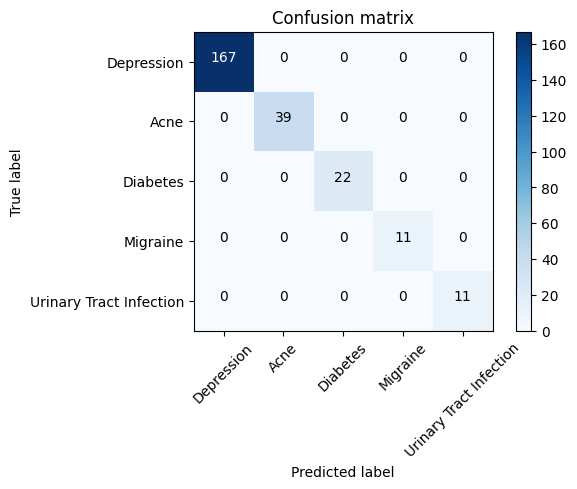

In [ ]:
from sklearn.metrics import classification_report
pred2 = pass_tf.predict(test_features)
score2 = metrics.accuracy_score(test_y, pred2)
print("testing accuracy:   %0.3f" % score2)
cm = confusion_matrix(test_y, pred2, labels=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
plot_confusion_matrix(cm, classes=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection'])
print(classification_report(test_y, pred2, target_names=['Depression', 'Acne','Diabetes','Migraine', 'Urinary Tract Infection']))

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle
model = LogisticRegression()
model.fit(train_features, y_train)
# save the model to disk
#filename = 'finalized_model.sav'
#pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


testing using unseen dataset 2

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_features,test_y)
print(result)

0.416


testing using saved model

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_features, y_test)
print(result)

0.956068094453597
